In [1]:
import pandas as pd #data frame
import seaborn as sns # analysis / visualization
from matplotlib import pyplot as plt  # ploting
import numpy as np       # linear algebra calculation
from sklearn.model_selection import train_test_split as tts  # data spliting
from sklearn.tree import DecisionTreeClassifier # decision tree algoritm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

import warnings as w
w.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Breast Cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

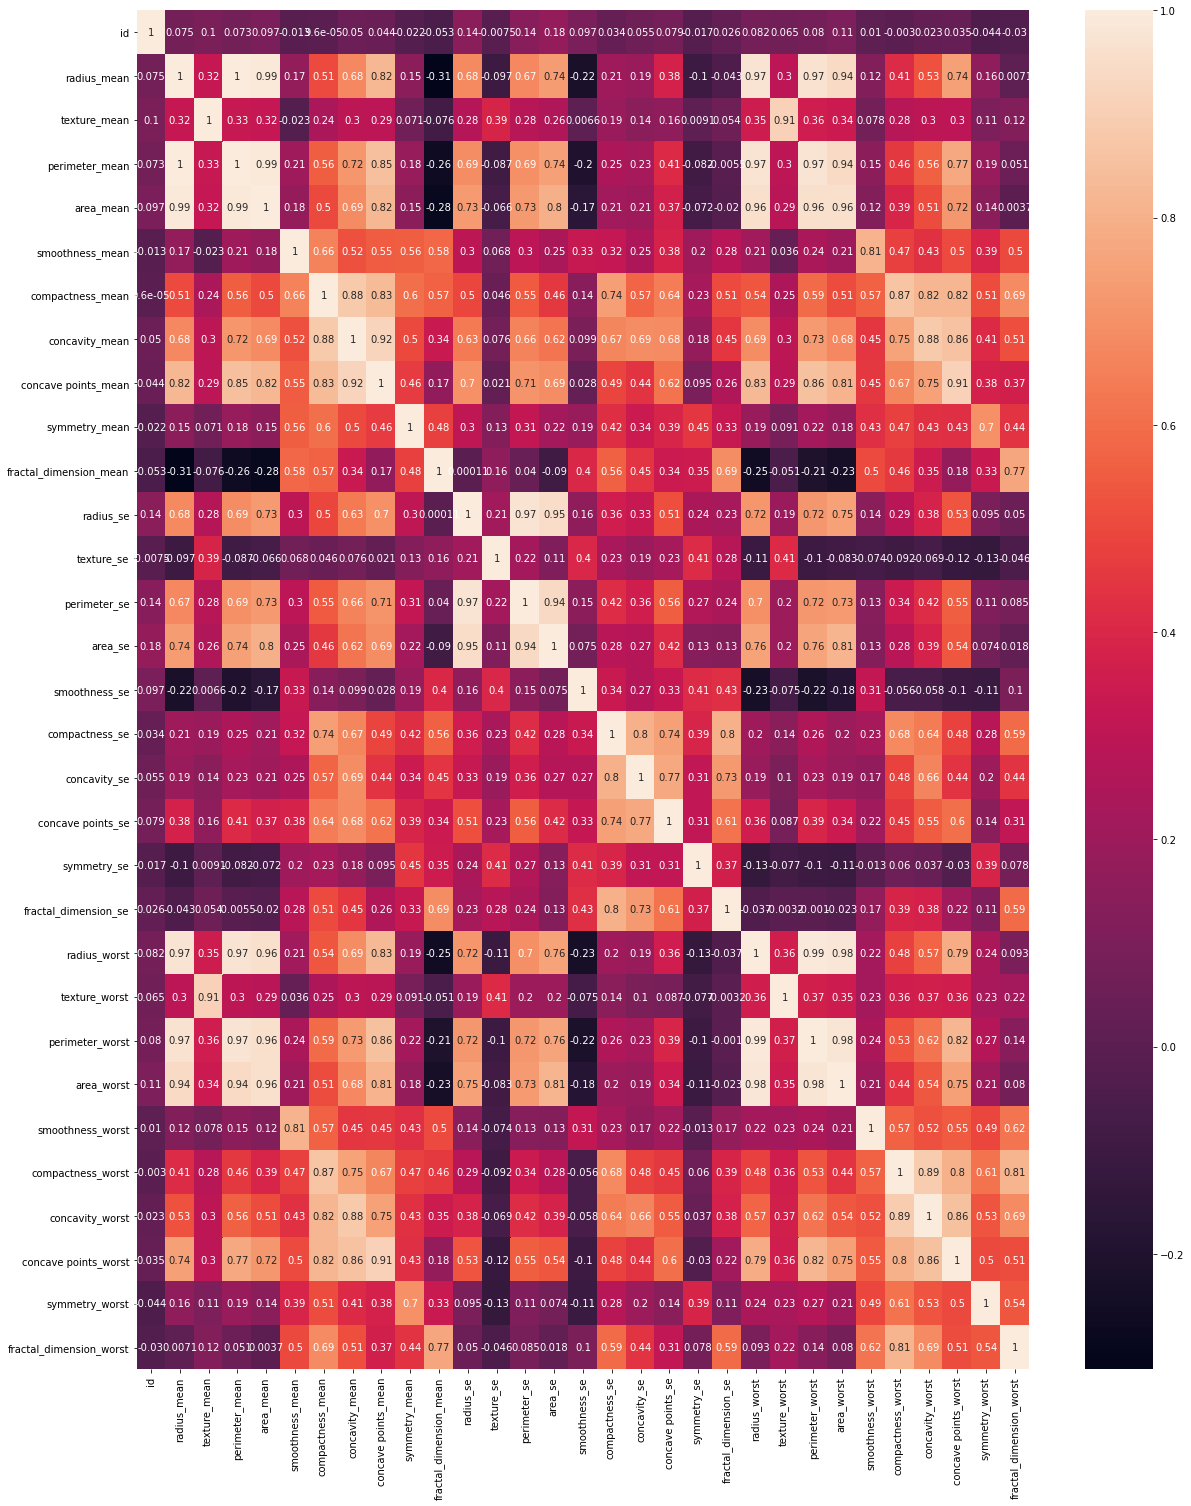

In [5]:
plt.figure(figsize=(20,25))
sns.heatmap(df.corr(),annot=True)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
x=df.drop(['diagnosis'],axis=1)
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y=df['diagnosis']
y.shape

(569,)

# Data split into train & test

In [9]:
from sklearn.model_selection import train_test_split as tts  # data spliting

In [10]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=1)

# KNN Classification

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
neigh = KNeighborsClassifier(n_neighbors=2)

In [13]:
neigh.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

# Decision Tree

In [14]:
clf = DecisionTreeClassifier() # creating object for decision tree

In [15]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

# Predict

In [16]:
pred_knn=neigh.predict(xtest)
print(pred_knn)
pred_dt=neigh.predict(xtest)
print(pred_dt)

['B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
['B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'M' 'B' 

# Classification report

In [17]:
print("Report of KNN:\n\n",classification_report(ytest, pred_knn))
print("Report of Decision Tree:\n\n",classification_report(ytest, pred_dt))

Report of KNN:

               precision    recall  f1-score   support

           B       0.74      0.99      0.85       108
           M       0.96      0.40      0.56        63

    accuracy                           0.77       171
   macro avg       0.85      0.69      0.70       171
weighted avg       0.82      0.77      0.74       171

Report of Decision Tree:

               precision    recall  f1-score   support

           B       0.74      0.99      0.85       108
           M       0.96      0.40      0.56        63

    accuracy                           0.77       171
   macro avg       0.85      0.69      0.70       171
weighted avg       0.82      0.77      0.74       171



# Confusion Matrix

In [18]:
cm_knn = confusion_matrix(ytest, pred_knn)
cm_knn

array([[107,   1],
       [ 38,  25]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for KNN Algorithm')

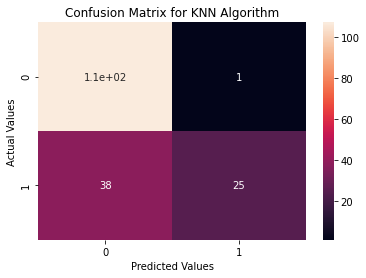

In [19]:
sns.heatmap(cm_knn, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for KNN Algorithm')

In [20]:
cm_dt = confusion_matrix(ytest, pred_dt)
cm_dt

array([[107,   1],
       [ 38,  25]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Algorithm')

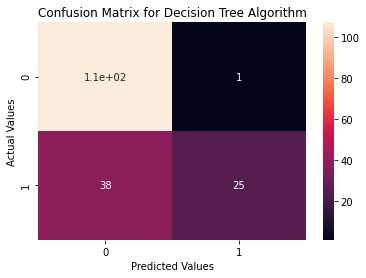

In [21]:
sns.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Decision Tree Algorithm')

# Plot ROC & AUC curve

In [22]:
from sklearn.metrics import plot_roc_curve

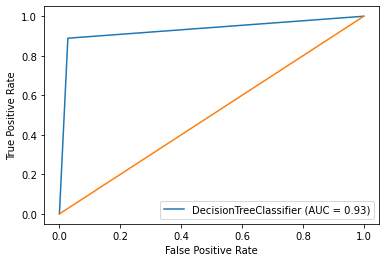

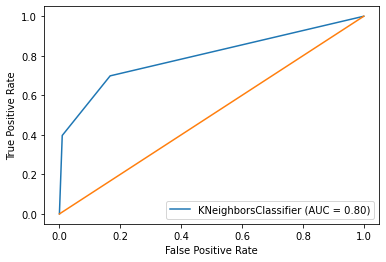

In [23]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1])
plot_roc_curve(neigh, xtest, ytest)

plt.plot([0,1],[0,1])

# Accuracy

In [24]:
tp,fp,fn,tn=confusion_matrix(ytest,pred_knn).reshape(-1)

In [25]:
accuracy_knn=(tp+tn)/(tp+fp+tn+fn)
print("KNN Accuracy:",accuracy_knn)

KNN Accuracy: 0.7719298245614035


In [26]:
tp,fp,fn,tn=confusion_matrix(ytest,pred_dt).reshape(-1)

In [27]:
accuracy_dt=(tp+tn)/(tp+fp+tn+fn)
print("Decision Tree Accuracy:",accuracy_dt)

Decision Tree Accuracy: 0.7719298245614035
